In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [4]:
#load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
#Scale data (very important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
#model
model = SVC(kernel='rbf',C=1.0,gamma='scale')
model.fit(X_train,y_train)

SVC()

In [26]:
#predict
y_pred = model.predict(X_test)
print("Accuarcy",accuracy_score(y_test,y_pred))

Accuarcy 1.0


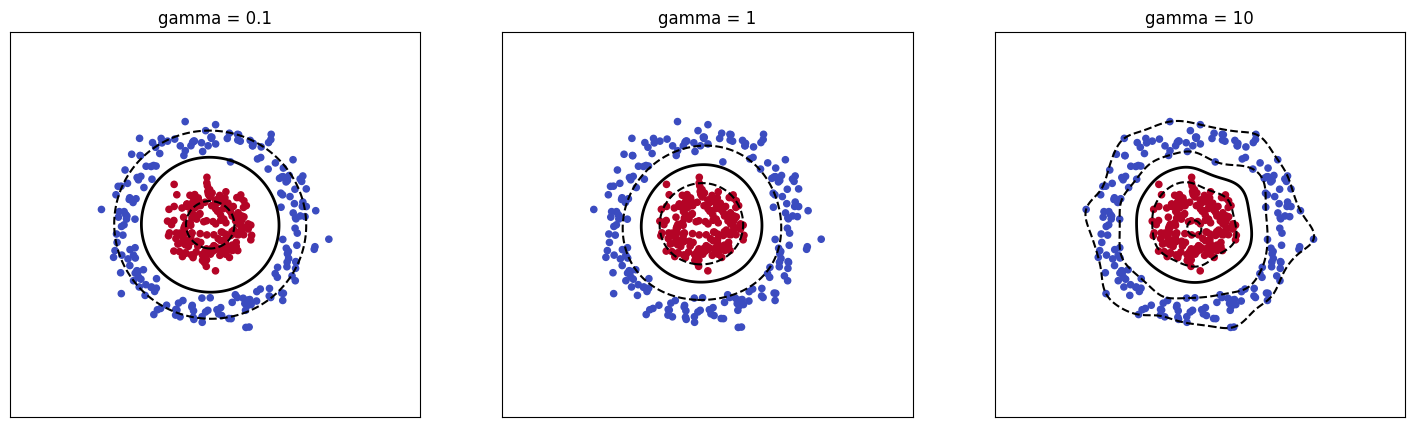

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

# Create non-linear dataset
X, y = make_circles(n_samples=400, factor=0.3, noise=0.1, random_state=42)

# Helper: plot decision boundary
def plot_svm(model, X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)

    # create a grid to evaluate model
    x0 = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300)
    x1 = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
    xx, yy = np.meshgrid(x0, x1)
    grid = np.c_[xx.ravel(), yy.ravel()]

    # decision function
    Z = model.decision_function(grid).reshape(xx.shape)

    # plot decision boundary + margins
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    ax.contour(xx, yy, Z, levels=[-1, 1], linestyles='--', colors='black')

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

# Gamma values to test
gammas = [0.1, 1, 10]

plt.figure(figsize=(18, 5))

for i, gamma in enumerate(gammas, 1):
    model = SVC(kernel='rbf', gamma=gamma, C=1)
    model.fit(X, y)

    ax = plt.subplot(1, 3, i)
    plot_svm(model, X, y, ax, f"gamma = {gamma}")

plt.show()
